In [41]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt
import qoptical as qo
qo.QO.DEBUG = True

# Driving harmonic oscillators
Starting at $T=0$, protocol $H_d=a_1(a+a^\dagger)sin(w_1 t)+ a_2(a+a^\dagger)sin(w_2 t)$

The Library supports driving of the form $H_d(t)=\sum_i f_i(t)H_i$

In [61]:
dimH        = 9
t_bath      = [0.0, 0.2, 0.25, 0.3]
y_0         = 1.4 # damping
Omega       = 1.0
tr          = (0, 5.50, 0.0005)
state0      = np.zeros(dimH**2, dtype=np.complex64).reshape((dimH, dimH))
state0[0,0] = 1
Ee          = [Omega * k for k in range(dimH)]
tlist       = qo.util.time_gatter(tr[0], tr[1], tr[2])

def op_a(n):
    """ 0          sqrt(1)     0           0           0
        0          0           sqrt(2)     0           0
        0          0           0           sqrt(3)     0
        0          0           0           0           sqrt(4)
        0          0           0           0           0
        """
    Oa = np.zeros(n ** 2, dtype=np.complex64).reshape((n, n))
    ar = np.arange(n-1)
    Oa[ar, ar+1] = np.sqrt(ar + 1)
    return Oa

Oa  = op_a(dimH)
Oad = Oa.conj().T
On  = Oad @ Oa
Ox  = Oa + Oad

# driving can take the form H=SUM_i f_i(t) H_i
drive = [
    (Ox, lambda t: 0.5 * Omega * np.sin(10 * t)),
    (Ox, lambda t: 0.5 * Omega * np.sin(5 * t))
]

In [62]:
reduced_system = qo.ReducedSystem(Omega * On)
expected_En = [
    sum(e_i * p_i for (e_i, p_i) in zip(Ee, qo.util.thermal_dist(Ee, t)))
    for t in t_bath
]
result = qo.opmesolve_cl_expect(
    tg = tr,
    reduced_system = reduced_system,
    t_bath = t_bath,
    y_0 = y_0,
    rho0 = state0,
    Oexpect = On,
    OHul = drive
)

[...] 
[...] rawrr!                              ,-""""""-.    OpenCL kernel v0.0
[...]                                  /\j__/\  (  \`--.    RK4 integrator
[...] Compile me,                      \`@_@'/  _)  >--.`.
[...] give me data                    _{.:Y:_}_{{_,'    ) )
[...] and I'll work that out 4u!     {_}`-^{_} ```     (_/
[...] 
[...] optimize the following dissipators:
[...] A(ω=7.999999523162842)
[...]  * <0|d|8> = (1+0j)
[...] A(ω=6.999999523162842)
[...]  * <0|d|7> = (1+0j)
[...]  * <1|d|8> = (1+0j)
[...] A(ω=6.000000476837158)
[...]  * <0|d|6> = (1+0j)
[...]  * <1|d|7> = (1+0j)
[...]  * <2|d|8> = (1+0j)
[...] A(ω=6.000000476837158)
[...]  * <0|d|6> = (1+0j)
[...]  * <1|d|7> = (1+0j)
[...]  * <2|d|8> = (1+0j)
[...] A(ω=5.0)
[...]  * <0|d|5> = (1+0j)
[...]  * <1|d|6> = (1+0j)
[...]  * <2|d|7> = (1+0j)
[...]  * <3|d|8> = (1+0j)
[...] A(ω=5.0)
[...]  * <0|d|5> = (1+0j)
[...]  * <1|d|6> = (1+0j)
[...]  * <2|d|7> = (1+0j)
[...]  * <3|d|8> = (1+0j)
[...] A(ω=5.0)
[...]  * <0|d

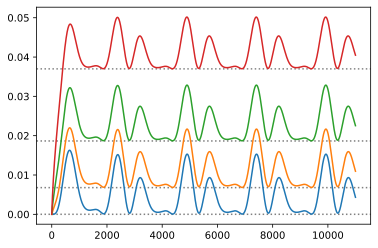

In [63]:
plt.axhline(0, linestyle=':', color="grey")
plt.axhline(1.0 / (np.exp(Omega / 0.2) - 1), linestyle=':', color="grey")
plt.axhline(1.0 / (np.exp(Omega / 0.25) - 1), linestyle=':', color="grey")
plt.axhline(1.0 / (np.exp(Omega / 0.3) - 1), linestyle=':', color="grey")

plt.plot(result[:, 0].real)
plt.plot(result[:, 1].real)
plt.plot(result[:, 2].real)
plt.plot(result[:, 3].real)